In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()

<AxesSubplot:>

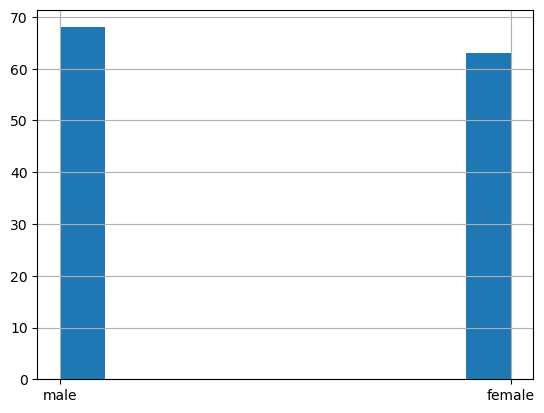

In [26]:
df.Gender.hist()

In [27]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [28]:
features = [x for x in df.columns if x != 'Gender']

X = df[features]
y = df['Gender']

In [37]:
X.columns=X.columns.str.replace(' ', '_')
X

,Age,Height_(cm),Weight_(kg),Occupation,Education_Level,Marital_Status,Income_(USD),Favorite_Color
0,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...
126,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

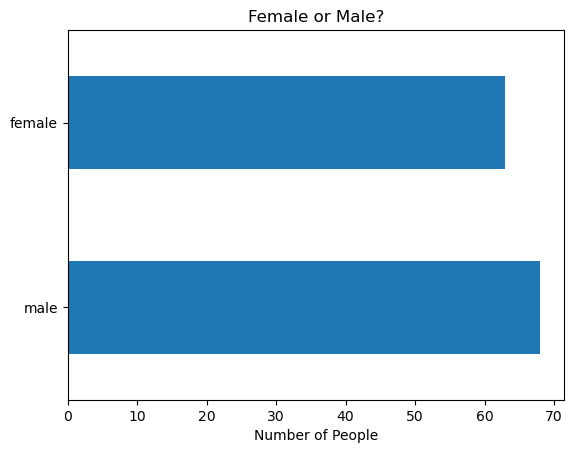

In [41]:
df['Gender'].value_counts().plot.barh()
plt.title('Female or Male?')
plt.xlabel('Number of People')
plt.show()

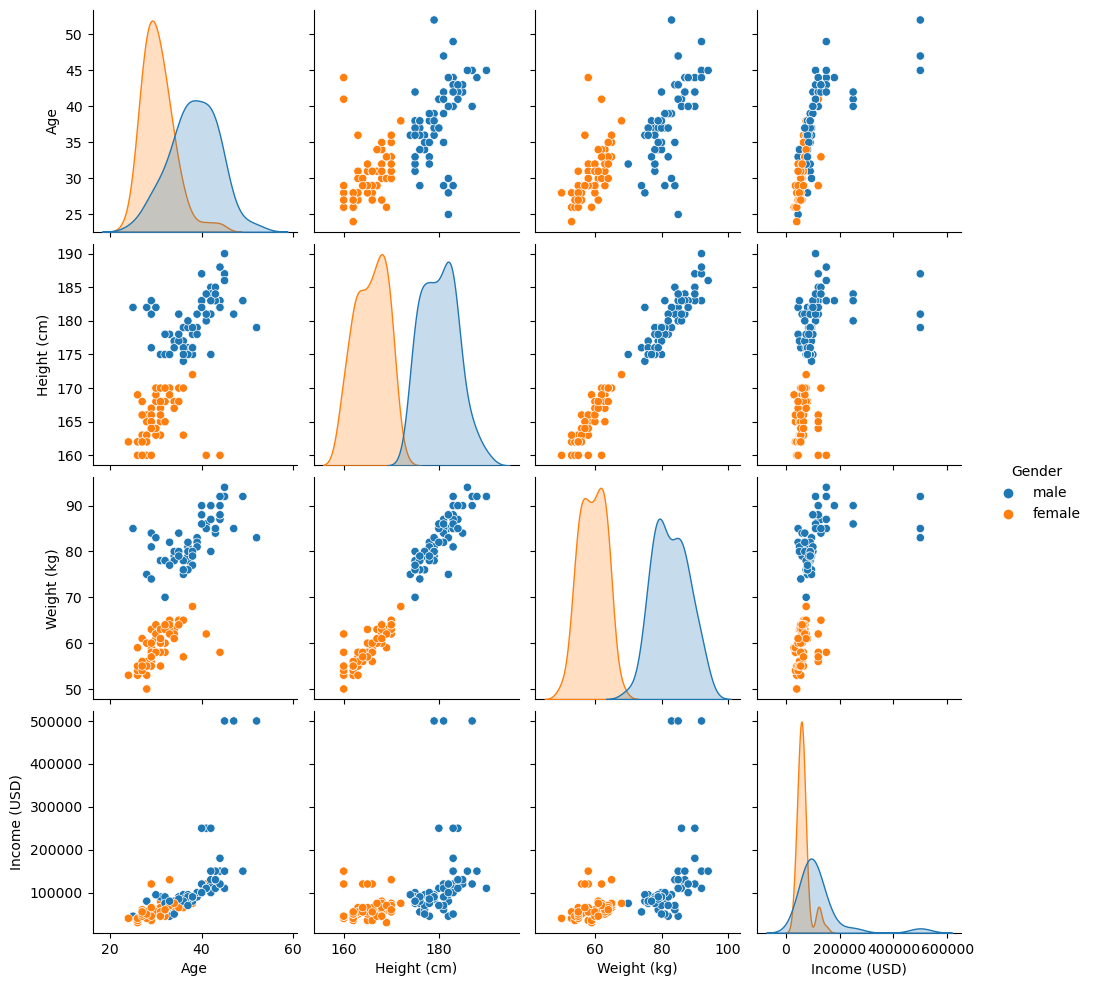

In [42]:
sns.pairplot(df,hue="Gender")
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

def generate_estimates():
    non_polys = ['Height_(cm)', 'Age', 'Weight_(kg)', 'Income_(USD)']
    ohes = ['Gender']

    poly_pipeline = Pipeline(
        ('standardize_poly', StandardScaler())
    )
    
    processing_pipeline = ColumnTransformer(transformers=[
        ('nonpoly_scaling', StandardScaler(), non_polys),
        ('dummys', OneHotEncoder(drop='first'), ohes)]
    )

    modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty=None))]
    )

    return modeling_pipeline.fit(X_train, y_train)

m = generate_estimates()
y_hat = m.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))